In [61]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [62]:
import numpy as np
import scipy.stats as ss
import pandas as pd
from sklearn.linear_model import LinearRegression
import itertools
from collections import defaultdict
from os import path
import pickle
import matplotlib.pyplot as plt
import traceback
plt.rcParams['figure.figsize'] = [22, 13]
pd.options.display.width = 500
n_bins_default = 15
num_poly_features = 1

In [63]:
def load_cache(file_path):
    with open(path.expanduser(file_path), 'rb') as f:
        cache_dict = pickle.load(f)
        df = cache_dict['df']
        p = list(cache_dict['parameter_names'])
        return df, p

In [64]:
class ModelPlot:
    def __init__(self, x, y, d, label, color, linewidth=3, linestyle=None):
        self.label = label
        self.color = color
        self.linewidth = linewidth
        self.linestyle = linestyle
        self.x = x
        self.y = y
        self.d = d

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def plot_model(model_plot_list, n_bins, ax=None, linear_regression=False, estimator=None):
    p = ax if ax is not None else plt
    for model_plot in model_plot_list:
        d_grouped_by_gs = model_plot.d.groupby(pd.cut(model_plot.d[model_plot.x.name], n_bins))
        d_grouped_by_gs_agg = d_grouped_by_gs.agg([np.mean])
        
        p.plot(
            d_grouped_by_gs_agg[model_plot.x.name]['mean'],
            d_grouped_by_gs_agg[model_plot.y.name]['mean'],
            label=model_plot.label,
            color=model_plot.color,
            linewidth=model_plot.linewidth/2,
            linestyle=model_plot.linestyle,
        )
        
        try:
            if estimator is None:
                estimator = LinearRegression()
            X_all = model_plot.d[model_plot.x.name].values
            X_all = X_all[:, np.newaxis]
            X_train = X_all[0:len(X_all)//2]

            y_all = model_plot.d[model_plot.y.name].values
            y_train = y_all[0:len(y_all)//2]
            
#             X_test = X_all[len(X_all)//2:-1]
#             y_test = y_all[len(y_all)//2:-1]
            
            x_plot = np.linspace(X_all.min(), X_all.max())

            model = make_pipeline(PolynomialFeatures(num_poly_features), estimator)
            model.fit(X_all, y_all)
#             mse = mean_squared_error(model.predict(X_test), y_test)
            y_plot = model.predict(x_plot[:, np.newaxis])
            p.plot(
                x_plot, y_plot, 
                label=f"{model_plot.label} {type(estimator).__name__}",
                color=model_plot.color,
                linewidth=model_plot.linewidth,
                linestyle=model_plot.linestyle,
            )
        except:
#             print(traceback.format_exc())
            print(f"could not compute estimator ({type(estimator).__name__})")
            pass
        
        if ax is not None:
            ax.set(xlabel=model_plot.x.name, ylabel=model_plot.y.name)
        else:
            plt.xlabel(model_plot.x.name)
            plt.ylabel(model_plot.y.name)

In [65]:
rename_dict = {
    'trajectory_length_trajectory_length': 'trajectory_length',
    'waypoint_relative_localization_error_translation_error_final': 'translation_error',
    'waypoint_relative_localization_error_rotation_error_final': 'rotation_error',
    'geometric_similarity_sensor_mean_of_translation_eigenvalues_ratio_all': 'tgs',
    'lidar_visibility_mean_visible_ranges_ratio': 'lvr',
    'waypoint_start_time': 'start_time',
}
robot_parameters = [
    'laser_scan_max_range',
    'laser_scan_fov_deg',
    'beta',
]
other_parameters = [
    'slam_node',
    'environment_name',
]
input_metrics = [
    'start_time',
    'tgs',
#     'lvr',
]
output_metrics = [
    'norm_translation_error',
    'translation_error',
    'rotation_error',
    'trajectory_length',
]

df, params = load_cache("/home/enrico/ds/performance_modelling/output/slam_many_odoms/run_data_per_waypoint_cache.pkl")

df_1, params_1 = load_cache("/home/enrico/ds/performance_modelling/output/slam_new_config/run_data_per_waypoint_cache.pkl")
df_1 = df_1[df_1.laser_scan_max_range.isin(df.laser_scan_max_range.unique())]
df_1 = df_1[df_1.laser_scan_fov_deg.isin(df.laser_scan_fov_deg.unique())]
df_1 = df_1[df_1.linear_angular_update.isin(df.linear_angular_update.unique())]

df = df.append(df_1)

df.rename(columns=rename_dict, inplace=True)
df['linear_update'] = df['linear_angular_update'].apply(lambda x: x[0])
df = df[p+fp+m]

for c in p+fp:
    print("{:>30}".format(c), sorted(list(df[c].unique())))

          laser_scan_max_range [8.0, 30.0]
            laser_scan_fov_deg [180, 359]
                          beta [(0.0, 0.0, 0.0, 0.0), (0.5, 0.0, 0.5, 0.0), (1.0, 0.0, 1.0, 0.0), (1.5, 0.0, 1.5, 0.0), (2.0, 0.0, 2.0, 0.0)]
                 linear_update [0.5]
                     slam_node ['gmapping', 'slam_toolbox']
              environment_name ['7A-2', 'airlab', 'fr079', 'office_b']


could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not com

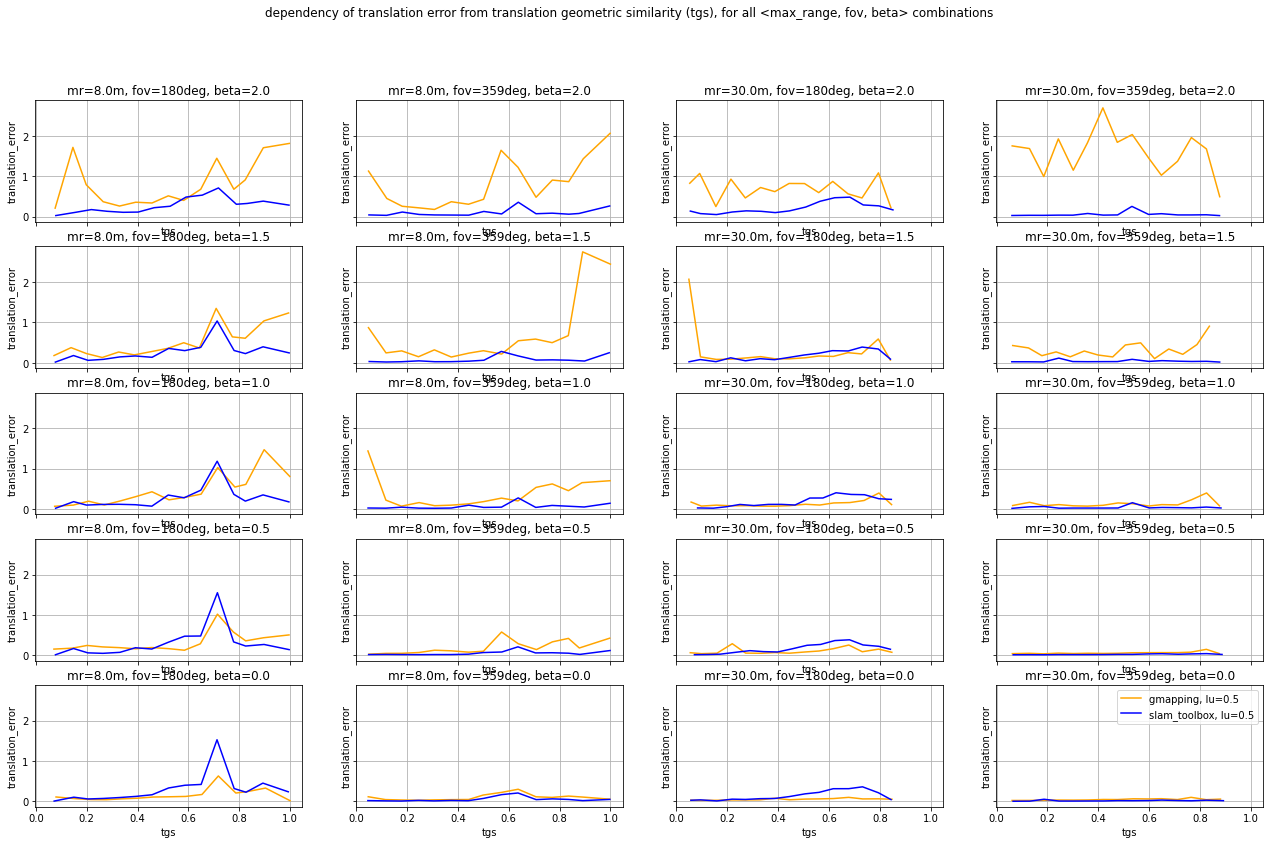

In [66]:
title = "dependency of translation error from translation geometric similarity (tgs), for all <max_range, fov, beta> combinations"
input_metric = df.tgs
output_metric = df.translation_error

mrs = sorted(list(df.laser_scan_max_range.unique()))
fovs = sorted(list(df.laser_scan_fov_deg.unique()))
betas = sorted(list(df.beta.unique()), reverse=True)
lus = sorted(list(df.linear_update.unique()))

mrs_fovs = list(itertools.product(mrs, fovs))

fig, axs = plt.subplots(len(betas), len(mrs_fovs))
for ax in axs.flat:
    ax.set(xlabel='translation geometric similarity (fixed range and fov)', ylabel='translation error')
for ax in axs.flat:
    ax.label_outer()
for i, beta in enumerate(betas):
    for j, (mr, fov) in enumerate(mrs_fovs):
        plot_model(
            [
                ModelPlot(
                    input_metric,
                    output_metric,
                    df[(df.slam_node == 'gmapping') &
                       (df.laser_scan_max_range == mr) &
                       (df.linear_update == lus[0]) &
                       (df.laser_scan_fov_deg == fov) &
                       (df.beta == beta)],
                    f'gmapping, lu={lus[0]}', 'orange', linestyle='-'),
                ModelPlot(
                    input_metric,
                    output_metric,
                    df[(df.slam_node == 'slam_toolbox') &
                       (df.linear_update == lus[0]) &
                       (df.laser_scan_max_range == mr) &
                       (df.laser_scan_fov_deg == fov) &
                       (df.beta == beta)],
                    f'slam_toolbox, lu={lus[0]}', 'blue', linestyle='-'),
            ],
            n_bins_default,
            axs[i, j],
            linear_regression=True,
        )
        axs[i, j].set_title(f"mr={mr}m, fov={fov}deg, beta={max(beta)}")
        axs[i, j].sharex(axs[0, 0])
        axs[i, j].sharey(axs[0, 0])
        axs[i, j].grid(True)

plt.legend()
plt.suptitle(title)
plt.show()

could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not com

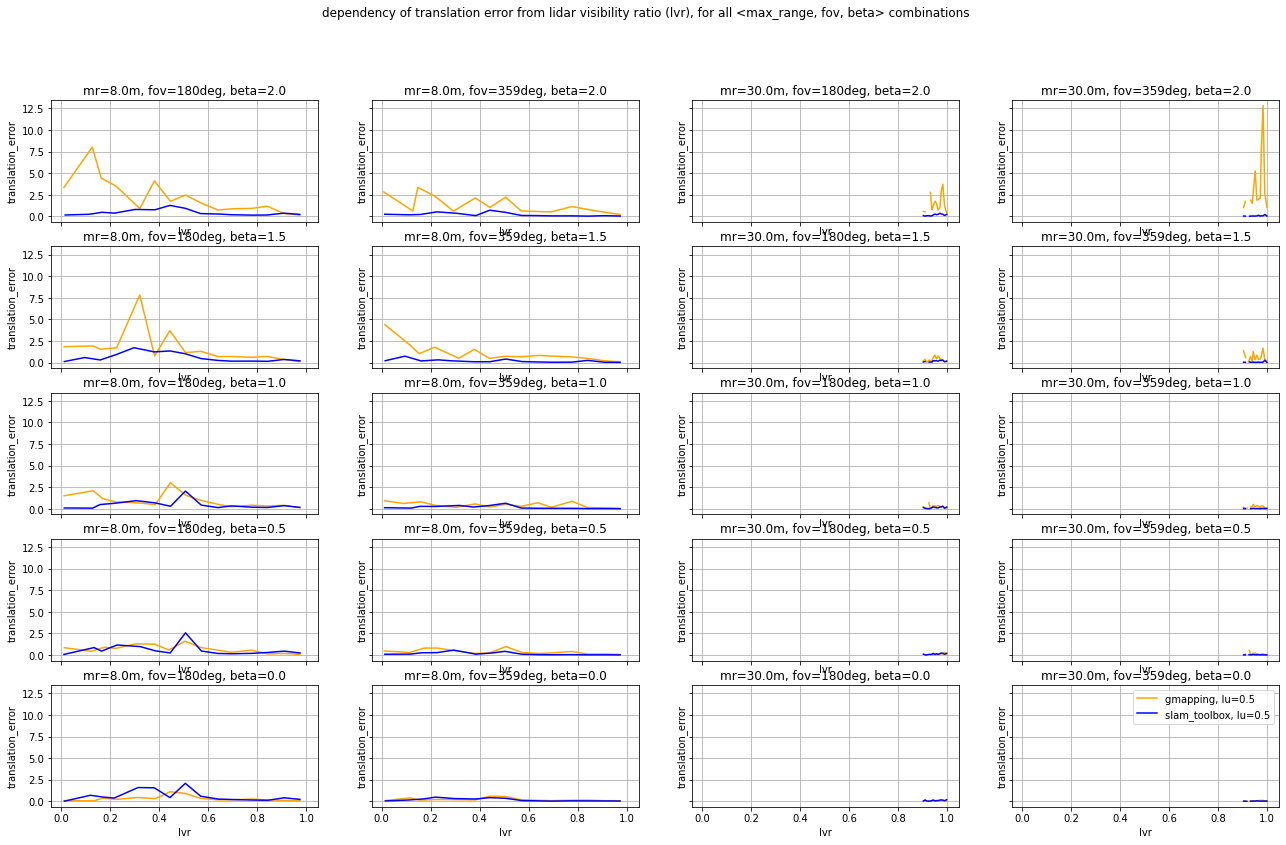

In [67]:
title = "dependency of translation error from lidar visibility ratio (lvr), for all <max_range, fov, beta> combinations"
input_metric = df.lvr
output_metric = df.translation_error

mrs = sorted(list(df.laser_scan_max_range.unique()))
fovs = sorted(list(df.laser_scan_fov_deg.unique()))
betas = sorted(list(df.beta.unique()), reverse=True)
lus = sorted(list(df.linear_update.unique()))

mrs_fovs = list(itertools.product(mrs, fovs))

fig, axs = plt.subplots(len(betas), len(mrs_fovs))
for ax in axs.flat:
    ax.set(xlabel='translation geometric similarity (fixed range and fov)', ylabel='translation error')
for ax in axs.flat:
    ax.label_outer()
for i, beta in enumerate(betas):
    for j, (mr, fov) in enumerate(mrs_fovs):
        plot_model(
            [
                ModelPlot(
                    input_metric,
                    output_metric,
                    df[(df.slam_node == 'gmapping') &
                       (df.laser_scan_max_range == mr) &
                       (df.linear_update == lus[0]) &
                       (df.laser_scan_fov_deg == fov) &
                       (df.beta == beta)],
                    f'gmapping, lu={lus[0]}', 'orange', linestyle='-'),
                ModelPlot(
                    input_metric,
                    output_metric,
                    df[(df.slam_node == 'slam_toolbox') &
                       (df.linear_update == lus[0]) &
                       (df.laser_scan_max_range == mr) &
                       (df.laser_scan_fov_deg == fov) &
                       (df.beta == beta)],
                    f'slam_toolbox, lu={lus[0]}', 'blue', linestyle='-'),
            ],
            n_bins_default,
            axs[i, j],
            linear_regression=True,
        )
        axs[i, j].set_title(f"mr={mr}m, fov={fov}deg, beta={max(beta)}")
        axs[i, j].sharex(axs[0, 0])
        axs[i, j].sharey(axs[0, 0])
        axs[i, j].grid(True)

plt.legend()
plt.suptitle(title)
plt.show()

could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)
could not com

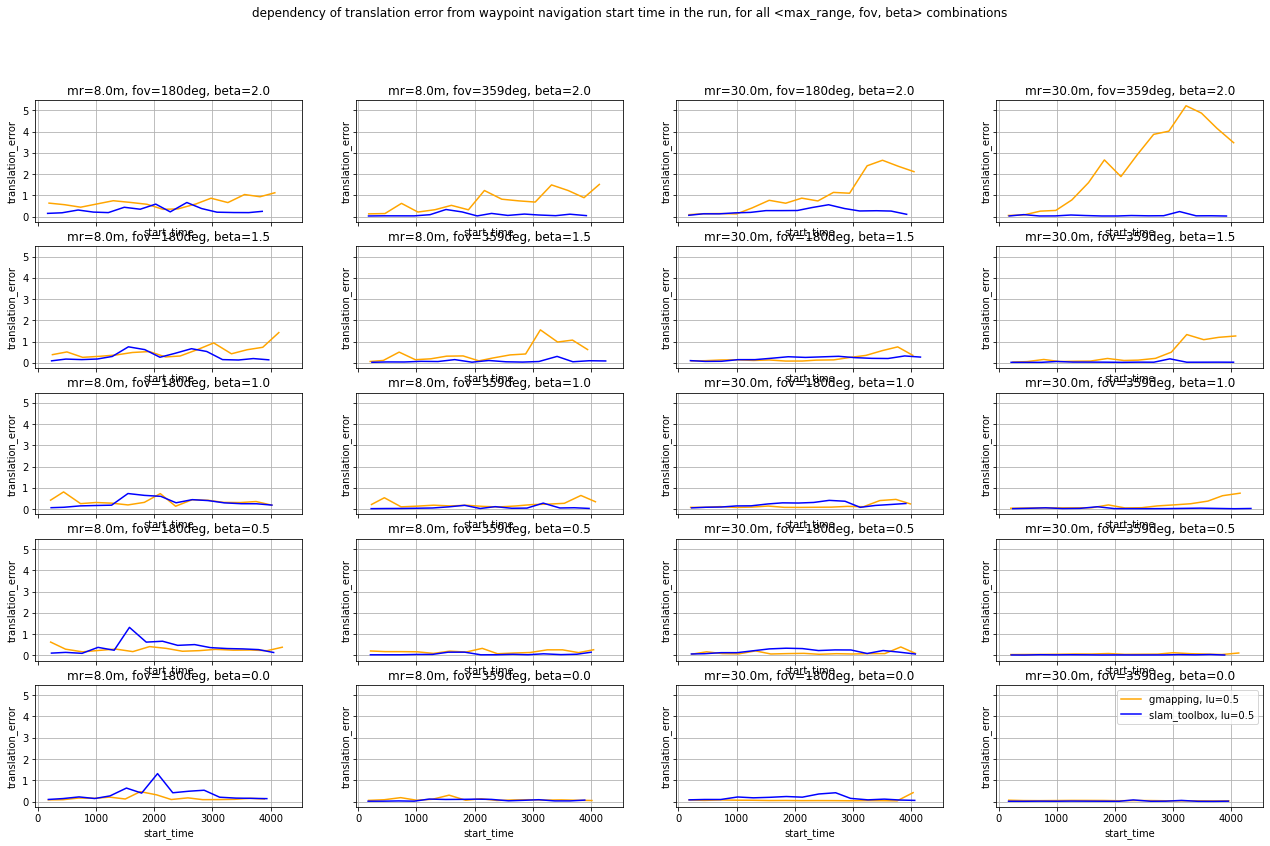

In [68]:
title = "dependency of translation error from waypoint navigation start time in the run, for all <max_range, fov, beta> combinations"
input_metric = df.start_time
output_metric = df.translation_error

mrs = sorted(list(df.laser_scan_max_range.unique()))
fovs = sorted(list(df.laser_scan_fov_deg.unique()))
betas = sorted(list(df.beta.unique()), reverse=True)
lus = sorted(list(df.linear_update.unique()))

mrs_fovs = list(itertools.product(mrs, fovs))

fig, axs = plt.subplots(len(betas), len(mrs_fovs))
for ax in axs.flat:
    ax.set(xlabel='translation geometric similarity (fixed range and fov)', ylabel='translation error')
for ax in axs.flat:
    ax.label_outer()
for i, beta in enumerate(betas):
    for j, (mr, fov) in enumerate(mrs_fovs):
        plot_model(
            [
                ModelPlot(
                    input_metric,
                    output_metric,
                    df[(df.slam_node == 'gmapping') &
                       (df.laser_scan_max_range == mr) &
                       (df.linear_update == lus[0]) &
                       (df.laser_scan_fov_deg == fov) &
                       (df.beta == beta)],
                    f'gmapping, lu={lus[0]}', 'orange', linestyle='-'),
                ModelPlot(
                    input_metric,
                    output_metric,
                    df[(df.slam_node == 'slam_toolbox') &
                       (df.linear_update == lus[0]) &
                       (df.laser_scan_max_range == mr) &
                       (df.laser_scan_fov_deg == fov) &
                       (df.beta == beta)],
                    f'slam_toolbox, lu={lus[0]}', 'blue', linestyle='-'),
            ],
            n_bins_default,
            axs[i, j],
            linear_regression=True,
        )
        axs[i, j].set_title(f"mr={mr}m, fov={fov}deg, beta={max(beta)}")
        axs[i, j].sharex(axs[0, 0])
        axs[i, j].sharey(axs[0, 0])
        axs[i, j].grid(True)

plt.legend()
plt.suptitle(title)
plt.show()

could not compute estimator (LinearRegression)
could not compute estimator (LinearRegression)


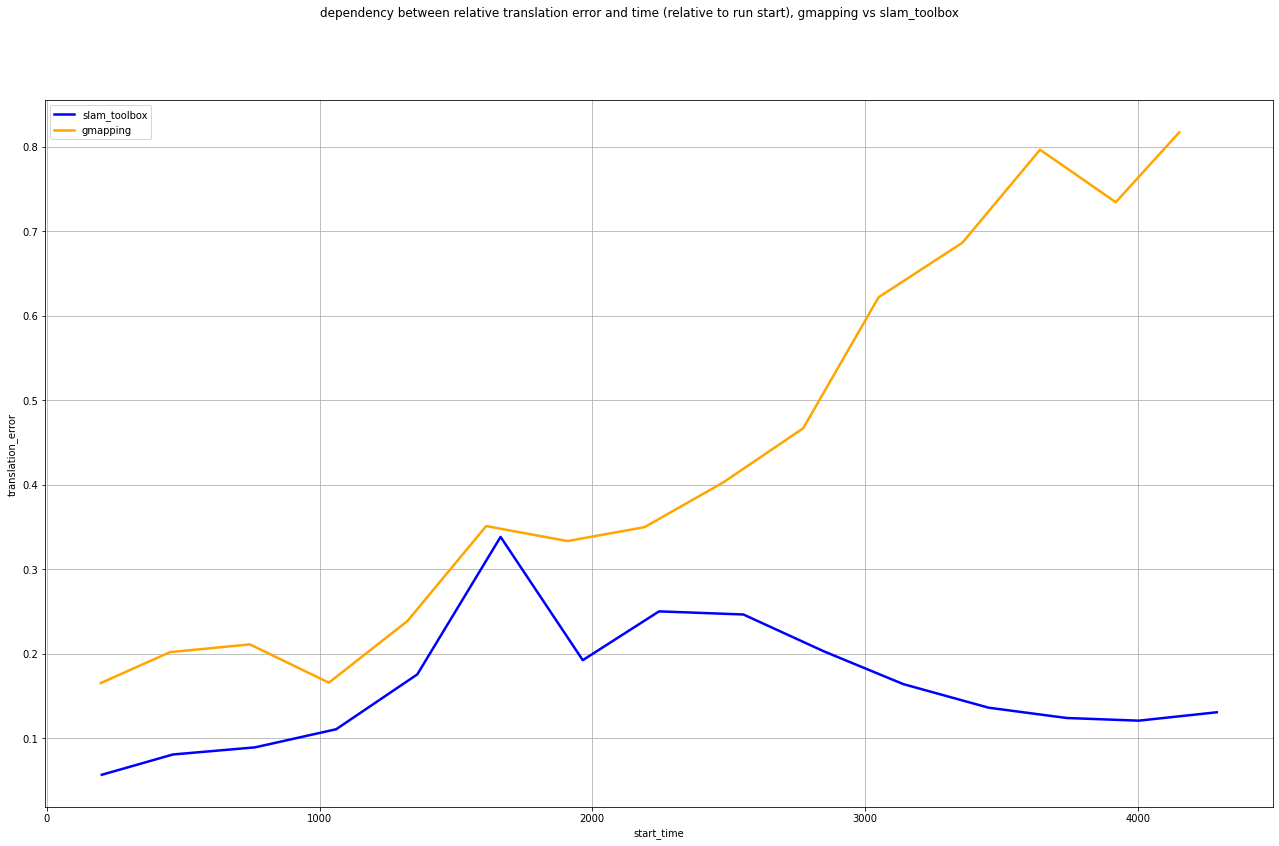

In [69]:
plot_model(
    [
        ModelPlot(
            df.start_time,
            df.translation_error, 
            df[df.slam_node == 'slam_toolbox'], 
            'slam_toolbox', 'blue', linewidth=5),
        ModelPlot(
            df.start_time, 
            df.translation_error, 
            df[df.slam_node == 'gmapping'], 
            'gmapping', 'orange', linewidth=5), 
    ],
    n_bins_default,
#     percentiles=[25, 95],
)

plt.legend()
plt.grid(True)
plt.suptitle("dependency between relative translation error and time (relative to run start), gmapping vs slam_toolbox")
plt.show()

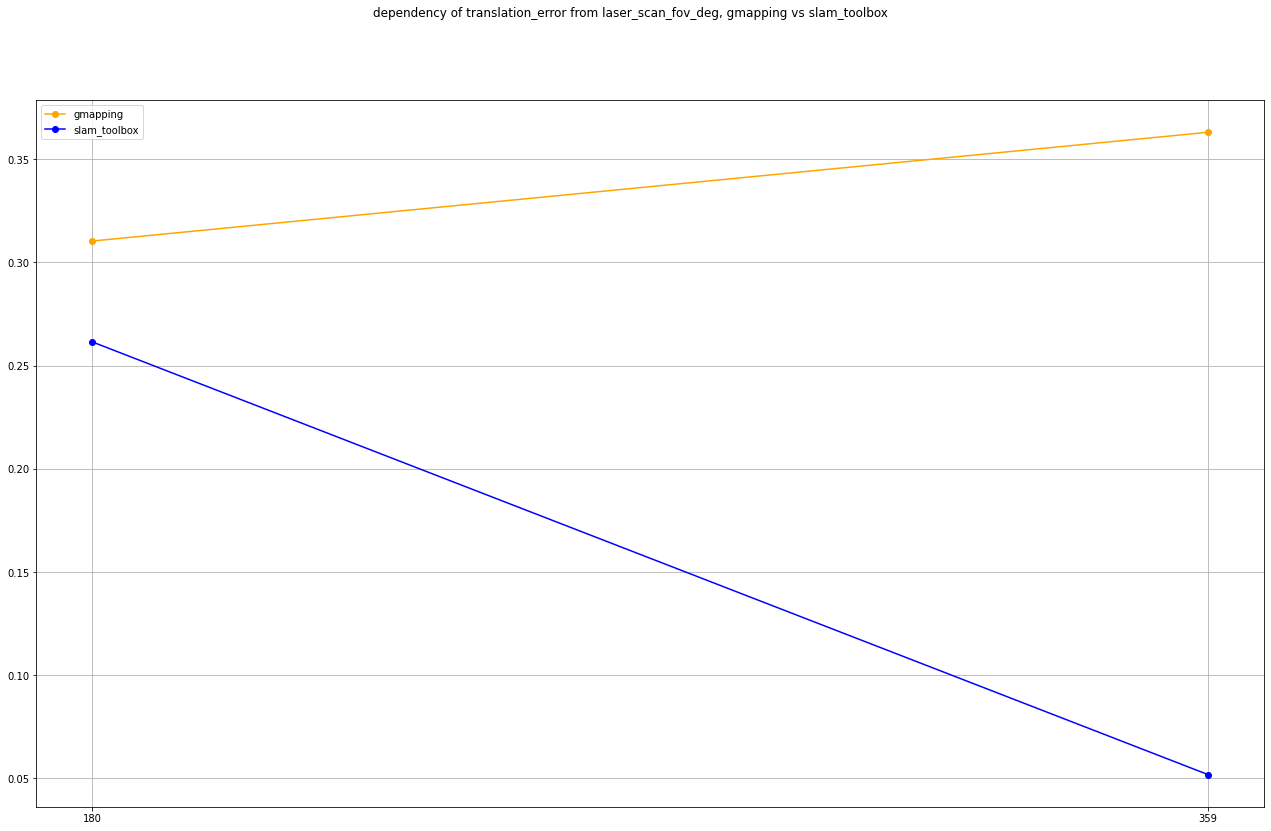

In [70]:
param = df.laser_scan_fov_deg
performance_metric = df.translation_error

df_param = df.groupby([df.slam_node, param]).mean()
df_gm_param = df_param.loc['gmapping']
plt.plot(df_gm_param.index, df_gm_param[performance_metric.name], label='gmapping', color='orange', marker='o')
df_st_param = df_param.loc['slam_toolbox']
plt.plot(df_st_param.index, df_st_param[performance_metric.name], label='slam_toolbox', color='blue', marker='o')

plt.xticks(param.unique())
plt.legend()
plt.grid()
plt.suptitle(f"dependency of {performance_metric.name} from {param.name}, gmapping vs slam_toolbox")
plt.show()

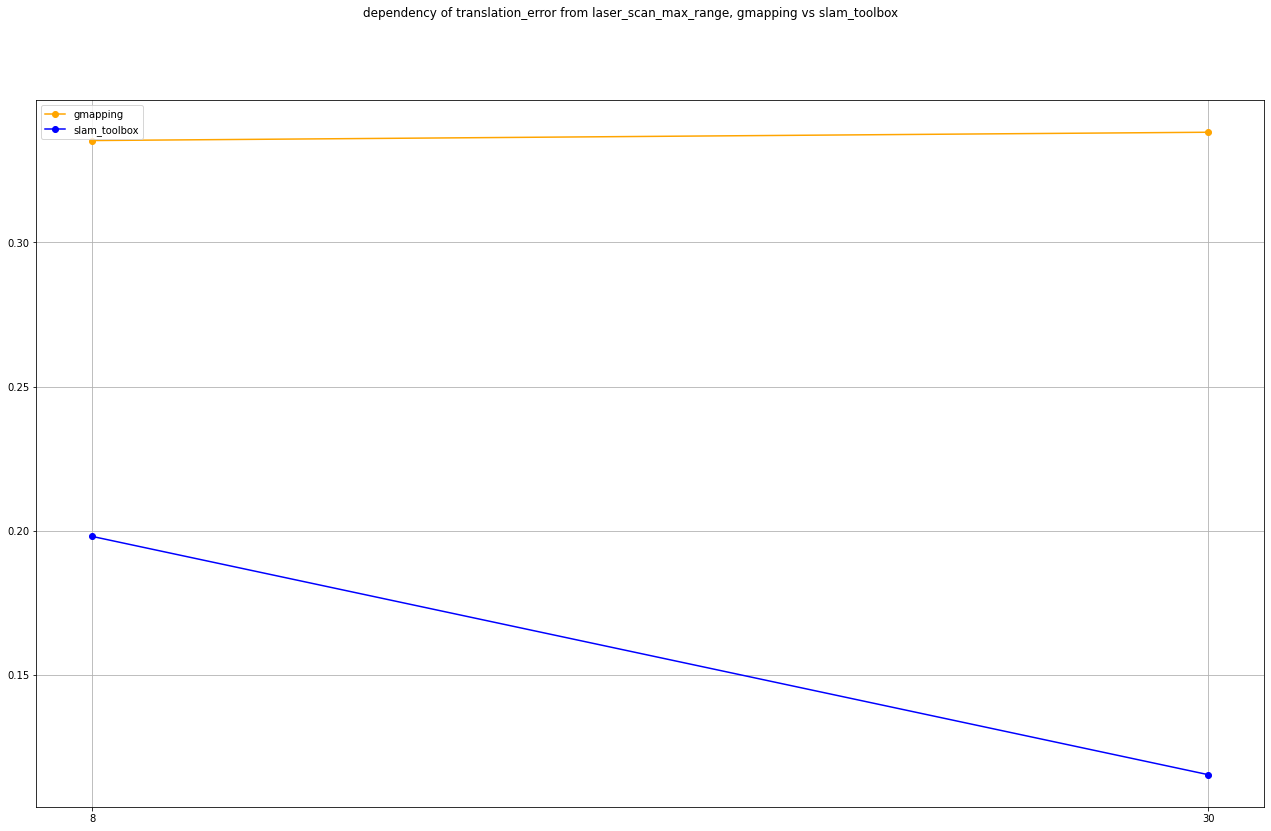

In [71]:
param = df.laser_scan_max_range
performance_metric = df.translation_error

df_param = df.groupby([df.slam_node, param]).mean()
df_gm_param = df_param.loc['gmapping']
plt.plot(df_gm_param.index, df_gm_param[performance_metric.name], label='gmapping', color='orange', marker='o')
df_st_param = df_param.loc['slam_toolbox']
plt.plot(df_st_param.index, df_st_param[performance_metric.name], label='slam_toolbox', color='blue', marker='o')

plt.xticks(param.unique())
plt.legend()
plt.grid()
plt.suptitle(f"dependency of {performance_metric.name} from {param.name}, gmapping vs slam_toolbox")
plt.show()